# Session 7 - Neural Networks for image data

In this notebook, we're going to see how we can train simple neural networks using ```TensorFlow```, a machine learning and deep learning framework developed by Google Research. You can find the documentation [here](https://www.tensorflow.org/).

We're still working on greyscale images at this point - next week, we'll start thinking about working with full colour images.

In [2]:
# generic tools
import numpy as np

# tools from sklearn
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# tools from tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

# matplotlib
import matplotlib.pyplot as plt

2023-03-17 14:43:14.018170: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Download data, train-test split

We're going to download the ```MNIST``` dataset again, so that we compare this pipeline to the baseline benchmarks we created previously.

In [3]:
# loading data returning x (data) and y (labels) seperatly
data, labels = fetch_openml('mnist_784', version=1, return_X_y=True)

# normalise data (reducing everything down between 0 and 1)
data = data.astype("float")/255.0

# split data
(X_train, X_test, y_train, y_test) = train_test_split(data,
                                                    labels, 
                                                    test_size=0.2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# convert labels to one-hot encoding
# it creates numerical representations/vectors (0 or 1) for the labels
# we do this to be able to work with TensorFlow later on
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [12]:
labels

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [14]:
# looking at the label for image 0
y_train[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

## Define neural network architecture using ```tf.keras```

We're now going to create our neural network using ```TensorFlow```. In particular, we're going to using the ```keras``` wrapper which makes the syntax a bit simpler to work with.

The code below makes a fully-connected, feed-forward neural network with the following features:

- Input layer of 784
- One hidden layer of 256
- Second hidden layer of 128
- An output layer of 10 nodes

In [5]:
X_train.shape

(56000, 784)

In [4]:
# define architecture 784x256x128x10
model = Sequential() # sequencial is feet forward
model.add(Dense(256, # adding first hidden dense layer
                input_shape=(784,), # the size of the data when flattened
                activation="relu")) # for this hidden layer the activation function for all the nodes should be relu
model.add(Dense(128, # adding second hidden layer
                activation="relu"))
model.add(Dense(10, # adding output layer
                activation="softmax")) # takes the values of all the outputs and fits it through the function to give 10 nodes that are between 0 and 1

## Show summary of model architecture

In [5]:
# summary function shows us the different layers and their hidden nodes
model.summary()
# it also shows the total number of weights (params)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Visualise model layers

If you want to do view this, there are some extra things that you can install - ```TensorFlow``` gives you instructions to do that.

**NB:** This might not work on Windows (but I'm not sure).

In [6]:
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Compile model loss function, optimizer, and preferred metrics

One of the big differences with ```TensorFlow``` vs ```scikit-learn``` is that we have much more control over how the optimization algorithm works.

We initalize the optimizer and then we have to *compile* the model.

In [16]:
# train model using SGD (stocastic grading descent)
sgd = SGD(0.01) # 0.01 is the learning weight (the higher the value the quicker it is to learn)
model.compile(loss="categorical_crossentropy", # loss function
              optimizer=sgd, # calling the sgd we just defined
              metrics=["accuracy"]) # what we want to optimize

## Train model and save history

Once we've done that, it's just a case of fitting the model to the data.

In [17]:
# using model.fit method to fit model onto training data and labels
history = model.fit(X_train, y_train, 
                    epochs=10, # run for 10 full epochs
                    batch_size=32) # batch sizes of 32
# 1750 are the number of batches

Epoch 1/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0983 - accuracy: 0.9718
Epoch 2/10
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0909 - accuracy: 0.9743
Epoch 3/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0847 - accuracy: 0.9760
Epoch 4/10
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0787 - accuracy: 0.9776
Epoch 5/10
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0737 - accuracy: 0.9794
Epoch 6/10
1750/1750 [==============================] - 4s 3ms/step - loss: 0.0690 - accuracy: 0.9808
Epoch 7/10
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0646 - accuracy: 0.9818
Epoch 8/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0606 - accuracy: 0.9833
Epoch 9/10
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0573 - accuracy: 0.9842
Epoch 10/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.053

## Visualise using ```matplotlib```

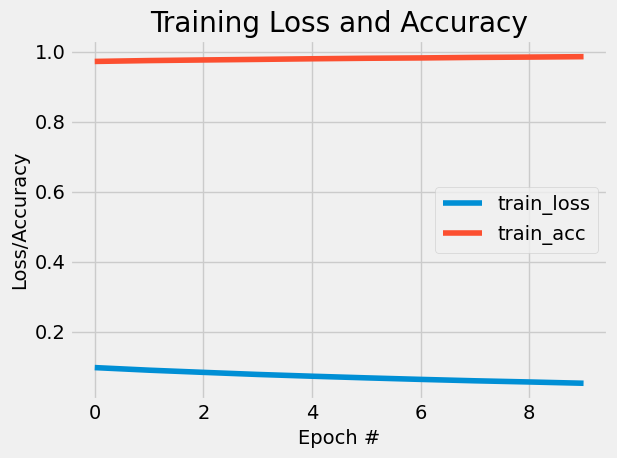

In [18]:
# plotting history of the model
plt.style.use("fivethirtyeight")
plt.figure()
plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
#plt.plot(np.arange(0, 10), history.history["val_loss"], label="val_loss", linestyle=":")
plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, 10), history.history["val_accuracy"], label="val_acc", linestyle=":")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.tight_layout()
plt.legend()
plt.show()

## Classifier metrics

We need to do a little bit of extra work to get the classification report to work properly.

In [19]:
# evaluate network
print("[INFO] evaluating network...")
predictions = model.predict(X_test, batch_size=32)

[INFO] evaluating network...
438/438 [==============================] - 1s 1ms/step


In [21]:
predictions

array([[1.7351317e-01, 1.1916432e-03, 3.8529222e-05, ..., 1.2363012e-06,
        7.3881415e-06, 8.0657492e-06],
       [3.0057863e-04, 1.9504188e-04, 1.0780422e-03, ..., 5.4462780e-03,
        8.5677248e-01, 5.4765970e-02],
       [1.1429969e-09, 8.0832935e-10, 2.2277744e-08, ..., 1.4503582e-06,
        1.2495169e-06, 6.9531961e-05],
       ...,
       [1.6839165e-06, 6.7420208e-10, 9.9999005e-01, ..., 7.9700179e-08,
        5.5652167e-06, 2.4976321e-09],
       [9.9361044e-01, 9.1855021e-09, 5.3549111e-06, ..., 4.5137835e-08,
        9.3158218e-05, 3.3044659e-03],
       [3.4241892e-09, 2.9206541e-08, 2.1084203e-08, ..., 1.7343128e-08,
        3.1164627e-06, 1.3906813e-04]], dtype=float32)

In [20]:
# creating classifictation report
print(classification_report(y_test.argmax(axis=1), 
                            predictions.argmax(axis=1), 
                            target_names=[str(x) for x in lb.classes_]))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1318
           1       0.99      0.99      0.99      1548
           2       0.98      0.98      0.98      1409
           3       0.97      0.97      0.97      1428
           4       0.98      0.98      0.98      1375
           5       0.95      0.98      0.96      1261
           6       0.98      0.98      0.98      1437
           7       0.98      0.97      0.98      1478
           8       0.97      0.95      0.96      1357
           9       0.96      0.96      0.96      1389

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



### Task

1. Turn the above into a ```.py``` script which can be run from the command line. Use argparse if you think it's relevant!
2. Use this notebook as a template to train a neural network on the ```Cifar-10``` dataset instead of ```MNIST```.
3. Turn *that* notebook into a ```.py``` script, too